In [59]:
#basic 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
#Modelling 
#data set is of continuos value (regression)
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [60]:
df=pd.read_csv('data/stud.csv')

In [61]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X-axis & Y-axis

In [62]:
x=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [63]:
print("Categories in 'gender' in variable:",end=" ")
print(df['gender'].unique())
print("*"*150)
print("Categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())
print("*"*150)
print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())
print("*"*150)
print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())
print("*"*150)
print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' in variable: ['female' 'male']
******************************************************************************************************************************************************
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
******************************************************************************************************************************************************
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
******************************************************************************************************************************************************
Categories in 'lunch' variable: ['standard' 'free/reduced']
******************************************************************************************************************************************************
Categories in 'test prepar

In [64]:
y = df['math_score']


In [65]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [66]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [67]:
x=preprocessor.fit_transform(x)

In [68]:
x.shape

(1000, 19)

In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [70]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_sqr=r2_score(true,predicted)
    return mae,rmse,r2_sqr

In [71]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
    
}
model_list=[]
r2_list=[]

In [72]:

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(xtrain,ytrain)
    
    #make Predictions 
    ytrain_pred=model.predict(xtrain)
    ytest_pred=model.predict(xtest)
    
    #evaluate the model 
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n') 

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.2483
- Mean Absolute Error: 4.1985
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5576
- Mean Absolute Error: 4.4183
- R2 Score: 0.8759


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.6850
- Mean Absolute Error: 4.5111
- R2 Score: 0.8535
--------------------------

In [73]:
# pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_name','R2_score']).sort_values(by=["R2_Score"],ascending=False)
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_name', 'R2_score']).sort_values(by=["R2_score"], ascending=False)


,Model_name,R2_score
2,Ridge,0.875907
0,LinearRegression,0.875863
7,CatBoostRegressor,0.852108
5,RandomForestRegressor,0.847612
8,AdaBoostRegressor,0.838603
6,XGBRegressor,0.811816
1,Lasso,0.810281
3,KNeighborsRegressor,0.772328
4,DecisionTreeRegressor,0.725628


Linear Regression

In [74]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.59


Plot y_pred and y_test


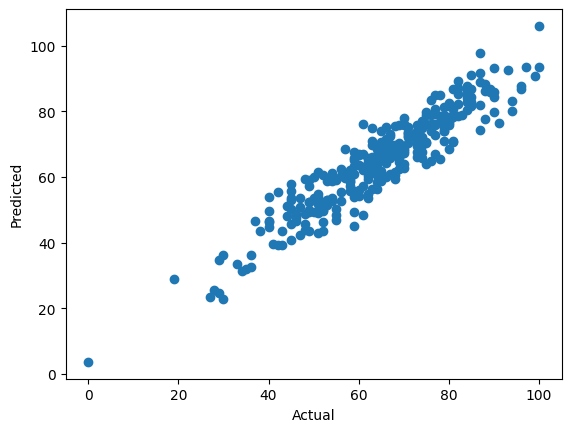

In [75]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

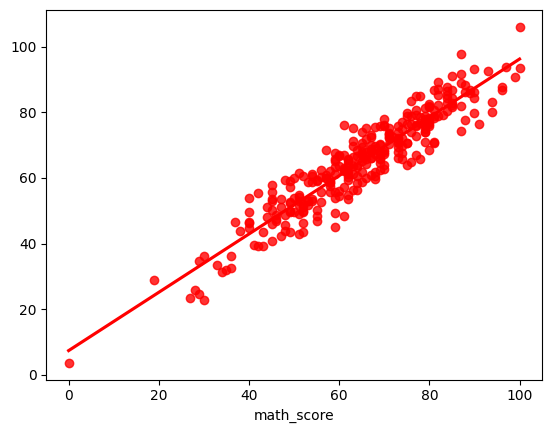

In [76]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


Difference between Actual and Predicted Values


In [58]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.511652,14.488348
737,53,58.898180,-5.898180
740,80,76.938478,3.061522
660,74,76.965881,-2.965881
411,84,87.633152,-3.633152
...,...,...,...
468,77,72.854766,4.145234
935,70,62.606548,7.393452
428,65,58.650347,6.349653
7,40,44.841375,-4.841375
